In [83]:
import pandas as pd
import numpy as np
import scipy.stats as ss

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [7]:
df = pd.read_csv('resources/Machine Learning Sections/Linear-Regression/USA_Housing.csv')

In [9]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


# Pairplot to look at all distributions

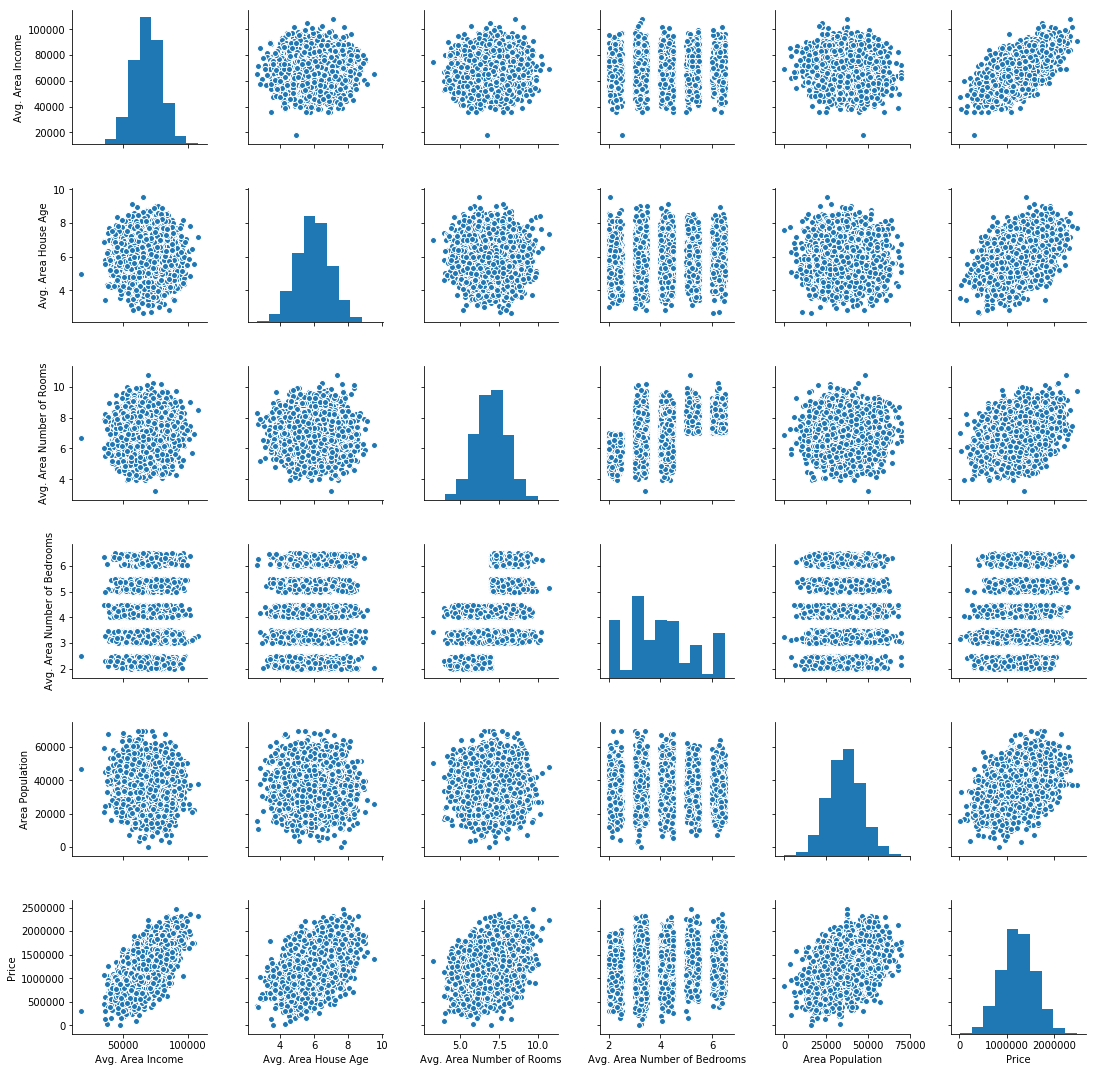

In [20]:
sns.pairplot(df)

# Distribution plot for parameter of interest

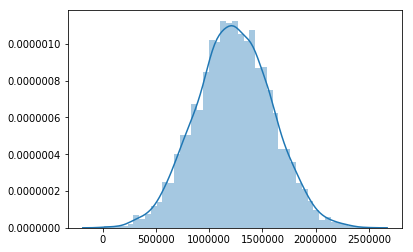

In [21]:
sns.distplot([df['Price']])

# Plot a correlation between all columns

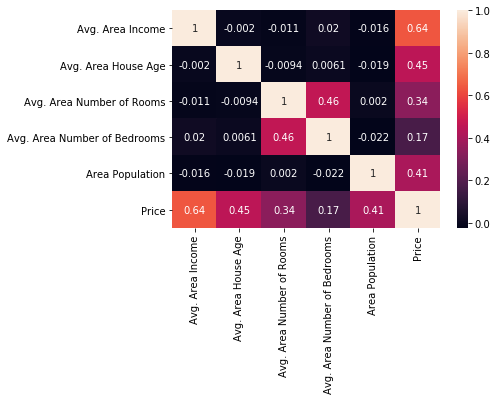

In [24]:
sns.heatmap(df.corr(), annot=True)

In [23]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# Identify features (X)

In [25]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [26]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

# Identify target variable to predict (X)

In [27]:
y = df['Price']

# Train-test split

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
# Tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# LinearRegression object

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# Instantiate the object
lm = LinearRegression()

# Fit model

In [37]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluate model by checking coefficient
- One coefficient per column in X

In [40]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [38]:
print(lm.intercept_)

-2640159.796851968


In [39]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [41]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [42]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


If all other features are fixed:
- A one unit increase in average area income leads to a $21.52 increase in house price

# Predictions
- on untrained data (X_test)

In [55]:
predictions = lm.predict(X_test)

In [56]:
predictions

array([1260960.70567625,  827588.75560352, 1742421.24254328, ...,
        372191.4062695 , 1365217.15140894, 1914519.54178823])

In [59]:
# y_test is the actual prices
y_test.head()

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
Name: Price, dtype: float64

In [60]:
# So how far off are our predictions?

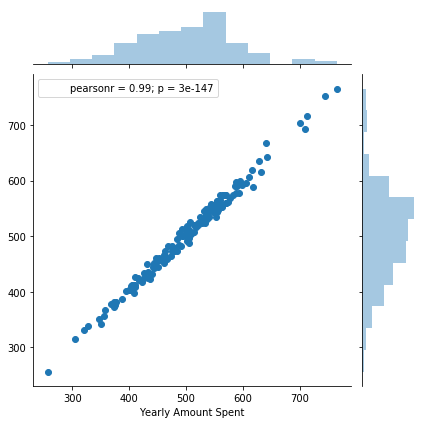

In [113]:
sns.jointplot(y_test, predictions)

# Histogram of residuals

$residual = actual - prediction$

Normally distributed residuals mean you chose a reasonable model

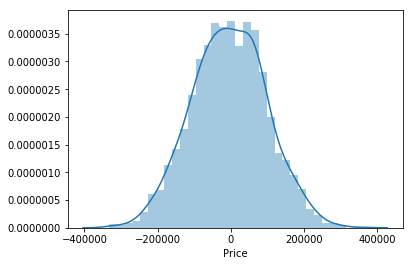

In [62]:
sns.distplot((y_test-predictions))

# Regression Evaluation metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [66]:
from sklearn import metrics

In [67]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914968

In [68]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209469

In [69]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291137

In [71]:
customers = pd.read_csv('resources/Machine Learning Sections/Linear-Regression/Ecommerce Customers')

In [72]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


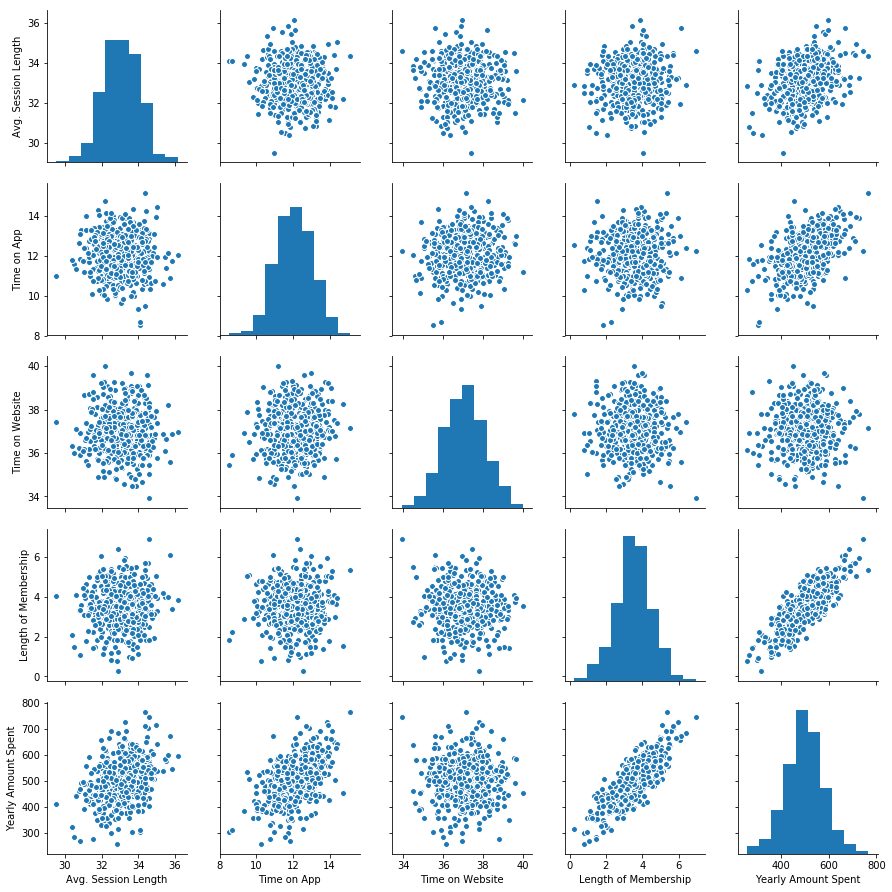

In [82]:
sns.pairplot(customers)

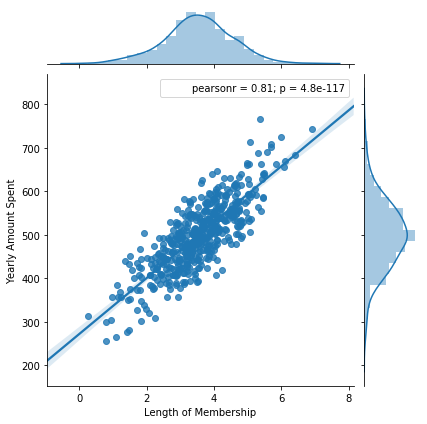

In [88]:
sns.jointplot(data=customers, x='Length of Membership', y='Yearly Amount Spent', kind='reg')

In [91]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [92]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()

In [98]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [100]:
predictions = lm.predict(X_test)

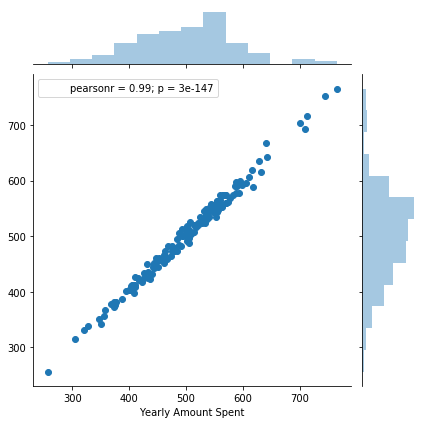

In [101]:
sns.jointplot(y_test, predictions)

In [102]:
from sklearn import metrics

In [103]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE 7.2281486534308215
MSE 79.81305165097424
RMSE 2.6885216483098704


In [106]:
# R^2. How much variance model explains
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

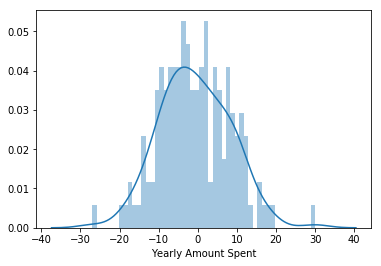

In [108]:
sns.distplot(y_test-predictions, bins=50)

In [112]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
